# Sentiment Analysis
Sentiment analysis is a somewhat controversial technique. It is controversial in the sense that we may question if it is right to computationally measure human sentiment, or whether it is right to 'flatten' it by assigning some text a simple category such as 'positive', or 'negative', or whether we can disconnect sentiment from semantics. For some there is the question of whether sentiment is actually the thing that we should measure in most cases, and perhaps there is a better measurement to 'capture' the phenomena instead.

- Do we want to know viewer's 'sentiment' about a piece of content they just viewed, or do we want to know what they are saying about it?
- Do we want to know the sentiment of how people describe their work environment, or do we want to know what it is about the work environment that matters?

It is also controversial in that for many years there have been very reasonable criticisms of whether it actually even *works*!

Today we'll review a range of methods for conducting sentiment analysis, understand why there are struggles with measuring sentiment, and apply it to some different data sources to see how effective it is.

Whether you come away from the session 'positive', 'negative', or 'neutral' about sentiment analysis you should at least understand how it works to the extent that you can critique its use by others, and determine whether it is a valid analysis to perform yourself.

## Approach 1: VADER
**V**alence **A**ware **D**ictionary and s**E**ntiment **R**easoner is a technique that relies primarily on lexicon based sentiment scoring. What this means is that each word is pre-assigned a sentiment score, ranging from extremely negative to extremely positive. VADER looks at some text and gives each word its score, and then summarises those scores to give an overall score for the text itself.

### Key things
- Vader is 'Valence Aware' which means it looks for other cues to determine sentiment. These include: Punctuation!!! USE OF CAPS TO SIGNAL INTENSITY OF FEELING. Use of emojis ❤️ that may convey sentiment. Words that may intensify, dampen or invert other word's meaning such as "very", "kind of" and "not".
- Vader is  specifically built for social media 


In [ ]:
contents = ["I would love to walk along the beach.", # Positive
             "I love my new record player", # Positive
               "I really hate it when my brother steals my things", # Negative
                 "I am a human"] # Neutral

In [ ]:
"""
At the command line, only need to run once to install the package via pip:
$ pip install google-generativeai
"""

from google import genai


from cred import GEMINI_KEY

client = genai.Client(api_key=GEMINI_KEY)
config = genai.types.GenerateContentConfig(
        temperature=1.0,
        response_mime_type="application/json",
    )


[
  {
    "sentence": "I would love to walk along the beach.",
    "label": "positive",
    "confidence": "0.95"
  },
  {
    "sentence": "I love my new record player",
    "label": "positive",
    "confidence": "0.98"
  },
  {
    "sentence": "I really hate it when my brother steals my things",
    "label": "negative",
    "confidence": "0.99"
  },
  {
    "sentence": "I am a human",
    "label": "neutral",
    "confidence": "0.99"
  }
]


In [9]:

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
sentence = "The food was great!"
vs = analyzer.polarity_scores(sentence)
for item in contents:
    print(analyzer.polarity_scores(item))

{'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'compound': 0.6369}
{'neg': 0.0, 'neu': 0.543, 'pos': 0.457, 'compound': 0.6369}
{'neg': 0.477, 'neu': 0.523, 'pos': 0.0, 'compound': -0.807}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In [16]:
confusing_sentences = ["the party was sick",
                        "She's got such a great mind. She's savage",
                          "Awesome, another parking ticket! Just what I need!",
                          "I absolutely love your ugly Christmas sweater! It is so ugly!"]
for confusing in confusing_sentences:
    scoring = analyzer.polarity_scores(confusing)
    if scoring['compound'] > 0:
        sentiment = 'Positive'
    else:
        sentiment = 'Negative'
    print(scoring, sentiment)

{'neg': 0.412, 'neu': 0.25, 'pos': 0.338, 'compound': -0.1531} Negative
{'neg': 0.229, 'neu': 0.458, 'pos': 0.313, 'compound': 0.2732} Positive
{'neg': 0.0, 'neu': 0.599, 'pos': 0.401, 'compound': 0.6892} Positive
{'neg': 0.402, 'neu': 0.383, 'pos': 0.215, 'compound': -0.5988} Negative


In [ ]:

from google import genai


from cred import GEMINI_KEY

client = genai.Client(api_key=GEMINI_KEY)
config = genai.types.GenerateContentConfig(
        temperature=1.0,
        response_mime_type="application/json",)

prompt = """You are a text sentiment analyser that returns polarity scores, where -1 indicates negative sentiment, 0 is neutral and 1 is positive sentiment. You can use decimal values. Analyze each provided document and assign it a polarity score and a label of positive, neutral or negative. You should also explain your reasoning for your score. 
Return a JSON formatted array that includes the sentence, its label, its polarity score and your reasoning."""

contents = ["I would love to walk along the beach.", "I love my new record player", "I really hate it when my brother steals my things", "I am a human"]

contents = [prompt] + contents
contents = [genai.types.Part.from_text(text=x) for x in contents]

response = client.models.generate_content(model="gemini-2.0-flash",
                config=config,
                contents=contents,
)
print(response.text)

[
  {
    "sentence": "I would love to walk along the beach.",
    "label": "positive",
    "polarity_score": 0.7,
    "reasoning": "The sentence expresses a desire and enjoyment, indicating a positive sentiment.",
    "revised_score": null
  },
  {
    "sentence": "I love my new record player",
    "label": "positive",
    "polarity_score": 0.9,
    "reasoning": "The sentence expresses love, which indicates a strong positive sentiment.",
    "revised_score": null
  },
  {
    "sentence": "I really hate it when my brother steals my things",
    "label": "negative",
    "polarity_score": -0.8,
    "reasoning": "The sentence expresses hate and being stolen from, indicating a strong negative sentiment.",
    "revised_score": null
  },
  {
    "sentence": "I am a human",
    "label": "neutral",
    "polarity_score": 0.0,
    "reasoning": "This sentence is a statement of fact and does not express any sentiment.",
    "revised_score": null
  }
]


In [18]:
contents = [prompt] + confusing_sentences
contents = [genai.types.Part.from_text(text=x) for x in contents]

response = client.models.generate_content(model="gemini-2.0-flash",
                config=config,
                contents=contents)

In [20]:
print(response.text)

[
  {
    "sentence": "the party was sick",
    "label": "positive",
    "polarity_score": "0.7",
    "reasoning": "In modern slang, 'sick' can be used to describe something as impressive or excellent. Therefore, this sentence is likely to be expressing a positive sentiment.",
    "revised_score": null
  },
  {
    "sentence": "She's got such a great mind. She's savage",
    "label": "positive",
    "polarity_score": "0.8",
    "reasoning": "The phrase \"great mind\" clearly indicates a positive sentiment. The word \"savage\" in modern slang can mean impressive or bold, especially when describing someone's intellect or actions. The combination strongly suggests positive sentiment.",
    "revised_score": null
  },
  {
    "sentence": "Awesome, another parking ticket! Just what I need!",
    "label": "negative",
    "polarity_score": "-0.8",
    "reasoning": "While \"awesome\" is typically positive, the sarcastic tone conveyed by the phrase \"another parking ticket! Just what I need!\" c

In [ ]:
!pip install lyricsgenius


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 kB 2.0 MB/s eta 0:00:00


In [ ]:
from google.colab import userdata
token = userdata.get('Genius')

In [ ]:
from lyricsgenius import Genius

genius = Genius(token)
genius.remove_section_headers = True
genius.excluded_terms = ["(Live), "]
artist = genius.search_artist("Lawrence",get_full_info=True, max_songs=1)
artist

Searching for songs by Lawrence...

Song 1: "Whatcha Want"

Reached user-specified song limit (1).
Done. Found 1 songs.


/usr/local/lib/python3.11/dist-packages/lyricsgenius/genius.py:603: FutureWarning: The constructor signature will change in a future version. It will change to Song(lyrics, body) instead of Song(client, json_dict, lyrics).
  song = Song(self, song_info, lyrics)


Artist(id, songs, ...)

In [ ]:
artist.id

26955

In [ ]:
for album in genius.artist_albums(artist.id)['albums']:
  print(album['name'])
  print(album['id'])
  print(album['release_date_for_display'])
  print('***')


Family Business
1093905
June 21, 2024
***
Hotel TV
771545
July 23, 2021
***
Living Room
419506
September 14, 2018
***
Breakfast: Unscrambled (Acoustic Sessions)
423792
April 27, 2018
***
Breakfast
288208
March 11, 2016
***
Homesick
288971
January 5, 2013
***


In [ ]:
chosen_album_ids = [1093905, # Family Business
                    771545, # Hotel TV
                    419506, # Living Room
                    288208 # Breakfast
                    ]

FB = genius.album_tracks(chosen_album_ids[0])

In [63]:
import pandas as pd

df = pd.DataFrame([x['song'] for x in FB['tracks']])
df = df[['id','title','artist_names','release_date_components']]
df['release_year'] = df['release_date_components'].map(lambda x: int(x['year']))
df

,id,title,artist_names,release_date_components,release_year
0,10484097,Whatcha Want,Lawrence,"{'year': 2024, 'month': 6, 'day': 21}",2024
1,10244330,Guy I Used To Be,Lawrence,"{'year': 2024, 'month': 4, 'day': 5}",2024
2,10486911,Do,Lawrence,"{'year': 2024, 'month': 6, 'day': 21}",2024
3,10486912,Something In The Water,Lawrence,"{'year': 2024, 'month': 6, 'day': 21}",2024
4,10484098,Hip Replacement,Lawrence,"{'year': 2024, 'month': 6, 'day': 21}",2024
5,6554984,​i’m confident that i’m insecure,Lawrence,"{'year': 2023, 'month': 8, 'day': 11}",2023
6,10486913,Promotion,Lawrence,"{'year': 2024, 'month': 6, 'day': 21}",2024
7,9539214,23,Lawrence,"{'year': 2023, 'month': 10, 'day': 20}",2023
8,10486914,Circle Back,Lawrence,"{'year': 2024, 'month': 6, 'day': 21}",2024
9,10486915,Death of Me,Lawrence,"{'year': 2024, 'month': 6, 'day': 21}",2024


In [65]:
for i, row in df.iterrows():
  lyrics = genius.lyrics(row['id'])
  df.loc[i,'lyrics'] = lyrics

In [66]:
df

,id,title,artist_names,release_date_components,release_year,lyrics
0,10484097,Whatcha Want,Lawrence,"{'year': 2024, 'month': 6, 'day': 21}",2024,Eyes on me (Eyes on me)\nTell me what you want...
1,10244330,Guy I Used To Be,Lawrence,"{'year': 2024, 'month': 4, 'day': 5}",2024,Hey\nOoh-hoo ho hoo whoa\nHoo-ooo goodbye (goo...
2,10486911,Do,Lawrence,"{'year': 2024, 'month': 6, 'day': 21}",2024,We got nothing to lose\nSo everybody just...\n...
3,10486912,Something In The Water,Lawrence,"{'year': 2024, 'month': 6, 'day': 21}",2024,Everybody thinks that changing is cool\nBut I ...
4,10484098,Hip Replacement,Lawrence,"{'year': 2024, 'month': 6, 'day': 21}",2024,"Oh, I don't need a hip replacement!\nLA party,..."
5,6554984,​i’m confident that i’m insecure,Lawrence,"{'year': 2023, 'month': 8, 'day': 11}",2023,"Well, shucks, I think I need to go to therapy\..."
6,10486913,Promotion,Lawrence,"{'year': 2024, 'month': 6, 'day': 21}",2024,Paid my dues\nShined my shoes\nShowed them my ...
7,9539214,23,Lawrence,"{'year': 2023, 'month': 10, 'day': 20}",2023,"Uh!\nHey yeah\nOh, ooh\nAt 23 you said goodbye..."
8,10486914,Circle Back,Lawrence,"{'year': 2024, 'month': 6, 'day': 21}",2024,"(Alexa, can you turn the lights purple?)\nOver..."
9,10486915,Death of Me,Lawrence,"{'year': 2024, 'month': 6, 'day': 21}",2024,A tree in the woods is misunderstood\nYou thin...


In [73]:
from google import genai

from google.colab import userdata
GEMINI_KEY = userdata.get('GOOGLE_API_KEY_1')

client = genai.Client(api_key=GEMINI_KEY)
config = genai.types.GenerateContentConfig(
        temperature=1.0,
        response_mime_type="application/json",
    )

prompt = """You are a song text sentiment classifier. You have been provided with a list of records. Each record contains an INDEX id field and a TEXT field containing the lyrics of a song. Label each provided TEXT lyrics with
 an overall sentiment label. Either positive, negative or neutral. You should also provide a confidence score. Return a JSON formatted array that includes the INDEX, the TEXT, its label and confidence score"""

contents = []
for i, row in df.iterrows():
  document = f"INDEX: {i}\nTEXT:{row['lyrics']}"
  contents.append(document)

contents = [prompt] + contents
contents = [genai.types.Part.from_text(text=x) for x in contents]

response = client.models.generate_content(model="gemini-2.0-flash",
                config=config,
                contents=contents,
)

[
  {
    "INDEX": 0,
    "TEXT": "Eyes on me (Eyes on me)\nTell me what you want (Tell me what you want)\nTell me what you need (Tell me what you need; woo)\nI can't sleep (Woo)\nTell me what you want (Oh)\nTell me what you need (Tell me what you need)\n\nBuzzFeed top ten ways that you hate me\nDon't ever call a girl crazy, but, lately\nThat is exactly what you're tryna make me ()\nMy mind's racing, I'm impatient\nMy meditation tells me it's in my head\nBut there you're goin' again with all the copy and pasting (\nSay it, I know you won't\n)\nFeel like I'm never gonna (\nSay it, I know you won't\n), no\n\nEyes on me\nTеll me what you want\nTell me what you need\nAnd I can't sleep\nTеll me what you want\n(\nTell me what you need\n) Tell me what you need\n\nHeadline reads fine, ooh, but, at this rate\nIt's sort of looking like clickbait, deepfake\nThese days, tryna win the crowd like a sweepstakes\nI've been to pre-K, I don't need a replay\n(\nUp and down the block\n) Running around lik

In [75]:
df = df.merge(pd.read_json(response.text)[['INDEX','label','confidence']], how='left', left_index=True, right_on='INDEX')
df

/tmp/ipython-input-650717761.py:1: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = df.merge(pd.read_json(response.text)[['INDEX','label','confidence']], how='left', left_index=True, right_on='INDEX')


,id,title,artist_names,release_date_components,release_year,lyrics,INDEX,label,confidence
0,10484097,Whatcha Want,Lawrence,"{'year': 2024, 'month': 6, 'day': 21}",2024,Eyes on me (Eyes on me)\nTell me what you want...,0,neutral,0.75
1,10244330,Guy I Used To Be,Lawrence,"{'year': 2024, 'month': 4, 'day': 5}",2024,Hey\nOoh-hoo ho hoo whoa\nHoo-ooo goodbye (goo...,1,positive,0.85
2,10486911,Do,Lawrence,"{'year': 2024, 'month': 6, 'day': 21}",2024,We got nothing to lose\nSo everybody just...\n...,2,positive,0.90
3,10486912,Something In The Water,Lawrence,"{'year': 2024, 'month': 6, 'day': 21}",2024,Everybody thinks that changing is cool\nBut I ...,3,negative,0.70
4,10484098,Hip Replacement,Lawrence,"{'year': 2024, 'month': 6, 'day': 21}",2024,"Oh, I don't need a hip replacement!\nLA party,...",4,positive,0.90
5,6554984,​i’m confident that i’m insecure,Lawrence,"{'year': 2023, 'month': 8, 'day': 11}",2023,"Well, shucks, I think I need to go to therapy\...",5,negative,0.85
6,10486913,Promotion,Lawrence,"{'year': 2024, 'month': 6, 'day': 21}",2024,Paid my dues\nShined my shoes\nShowed them my ...,6,neutral,0.70
7,9539214,23,Lawrence,"{'year': 2023, 'month': 10, 'day': 20}",2023,"Uh!\nHey yeah\nOh, ooh\nAt 23 you said goodbye...",7,negative,0.90
8,10486914,Circle Back,Lawrence,"{'year': 2024, 'month': 6, 'day': 21}",2024,"(Alexa, can you turn the lights purple?)\nOver...",8,neutral,0.60
9,10486915,Death of Me,Lawrence,"{'year': 2024, 'month': 6, 'day': 21}",2024,A tree in the woods is misunderstood\nYou thin...,9,negative,0.90


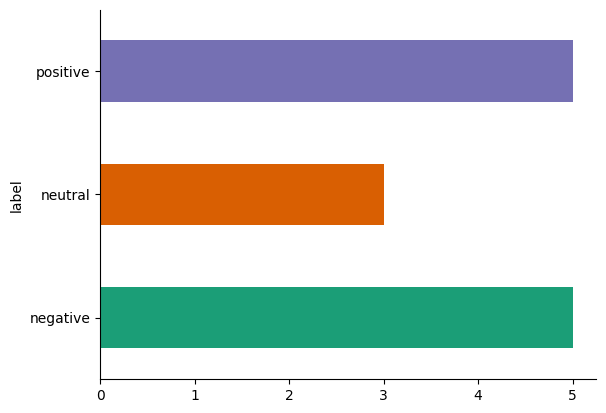

In [76]:
# @title label

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)